# Detecting ECG-related Cardiovascular Diseases

This notebook shows how to use the modules used for detecting cardiovascular diseases (CVDs), namely:  
1. Premature Atrial Contraction (PAC)
2. Bundle Branch Block Beat (BBBB)
3. Premature Ventricular Contraction (PVC)
4. Atrial Fibrillation (AFIB)
5. Ventricular Fibrillation (VFIB)

Since the models detect CVDs at a beat-by-beat resolution, the algorithm comes with an automated ECG beat detection which use a Hamilton segmenter to locate the R-peaks of the ECG signal. A 400-ms sample is obtained both left and right of the R-peak location which serves as a beat sample.  

The first 3 in the list (PAC, BBBB and PVC) is detected using *pac_pvc_bbbb_model*, AFIB and VFIB is detected using *afib_model* and *vfib_model*, respectively. All models are stored in the *Classifiers* folder of the repo *ecg_research*.

Input for each model is a raw single-lead ECG signal and it outputs the predictions, the detected beats and the *reduced* beats (beat signals reduced using PCA).

In [4]:
import sys
sys.path.insert(0, '/Users/user/Documents/ecg_research/')

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.externals import joblib as jl
from savvyecg import ecg_module as em
%matplotlib inline


# PAC, PVC and BBBB Detection

#### Premature Atrial Contraction (PAC)  

Premature atrial contractions (PACs) are beats which are initiated in the atria or upper chambers of the heart, prematurely, which cause the SA node (the natural pacemaker of the heart) to be interrupted. The terms SVEs (supraventricular extrasytoles) and PJCs (premature junctional contractions) are also often used when describing these beats but the distinctions are beyond the scope of this discussion.

PACs are one of the two most common heart rhythm abnormalities observed, the other being PVCs (premature ventricular contractions). They are frequently benign and require no treatment. However, in some cases they may be so frequent (over 15-20/minute) that they may cause the heart to beat inefficiently enough to cause symptoms which may need to be addressed. Occasionally, patients who have PACs may also have atrial fibrillation at other times.

#### Bundle Branch Block Beat (BBBB)

The determination that a bundle branch block (often referred to as BBB) exists is made by reviewing a patient’s EKG. In the presence of a bundle branch block, the QRS is wider than its normal value of .04-.10 seconds and will typically be .12-.16 seconds. In bundle branch block, only one of the ventricles is directly caused to contract by the impulse from the atria. The other ventricle is actually caused to contract by the impulse traveling through the ventricles heart tissue itself. Since this results in one ventricle contracting before the other, the QRS width is increased. Both right and left bundle branch blocks can occur (with additional classifications due to the fact that there are two minor branches of the left bundle). These are referred to as right and left bundle branch blocks or RBBB and LBBB.

#### Premature Ventricular Contraction (PVC)
Premature ventricular contractions (PVCs) are beats which are initiated in the ventricles or lower chambers of the heart, prematurely. As opposed to PACs, when the SA node (the natural pacemaker of the heart) gets interrupted, PVCs do not interrupt the SA node. However, with a PVC the ventricles contract, which normally causes the impulse from the atria to be blocked from reaching the ventricles.

PVCs are one of the two most common heart rhythm abnormalities, the other being PACs (premature atrial contractions). They are frequently benign and require no treatment. However, in some cases they may be so frequent (over 15-20/minute) that they may cause the heart to beat inefficiently enough to cause symptoms which may need to be addressed.



Database is from incartdb of Physionet.

In [2]:
# path = "/Users/user/physionet.org/physiobank/database/incartdb/"

In [6]:
pac_pvc_bbbb_patient_dict = jl.load('/Users/user/Documents/ecg_research/Databases/PAC_PVC_BBB_patients.pickle')

In [7]:
sample_data = pac_pvc_bbbb_patient_dict[b'I01']

Function *pac_pvc_bbbb_predict_dict* from *ecg_util* uses raw ECG signal as input and outputs the predictions, the extracted beats and the reduced beats (reduced using PCA). The columns are labelled as 'N', 'PAC', 'BBBB', 'PVC' for Normal, Premature Atrial Contraction, Bundle Branch Block, and Prematre Ventricular Contraction.  

The PAC, PVC, and BBBB predictors are on average around $99\%$ accurate and have $<4\%$ false positive rate.

In [8]:
pac_pvc_bbbb_predict_dict = em.predict_pac_pvc_bbbb(sample_data,f = 250)
pac_pvc_bbbb_predictions = pac_pvc_bbbb_predict_dict['predictions']
pac_pvc_bbbb_beats = pac_pvc_bbbb_predict_dict['beats']
pac_pvc_bbbb_pca_beats = pac_pvc_bbbb_predict_dict['PCA beats']

Changing the labels from array to a single number:  
1 = Normal  
2 = PAC  
3 = BBBB  
4 = PVC  

In [93]:
labels = np.dot(pac_pvc_bbbb_predictions, np.array([1,2,3,4])) 

In [103]:
N_beats = pac_pvc_bbbb_beats[np.where(labels == 1)]
PAC_beats = pac_pvc_bbbb_beats[np.where(labels == 2)]
BBBB_beats = pac_pvc_bbbb_beats[np.where(labels == 3)]
PVC_beats = pac_pvc_bbbb_beats[np.where(labels == 4)]

### Predicted Normal Beat

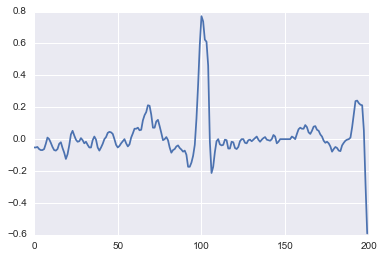

In [134]:
plt.plot(N_beats[-15])

### Predicted PAC Beat

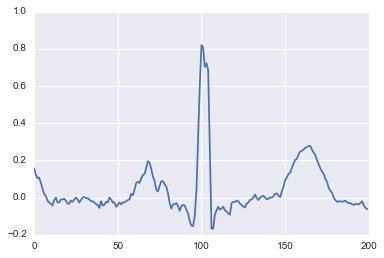

In [139]:
plt.plot(PAC_beats[-5])

## Predicted BBBB Beat

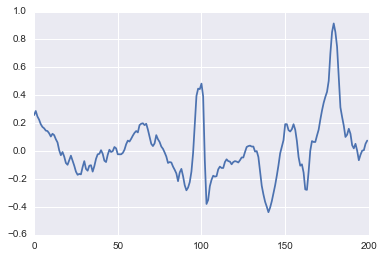

In [152]:
plt.plot(BBBB_beats[2])

## Predicted PVC Beat

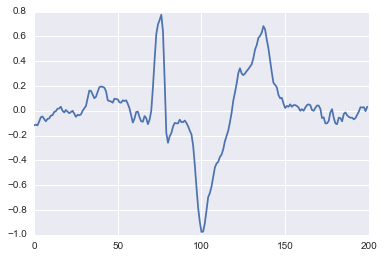

In [153]:
plt.plot(PVC_beats[2])

# Atrial Fibrillation Detection

In atrial fibrillation, the upper chambers of the heart (the atria) beat irregularly (quiver) instead of beating effectively to move blood into the ventricles.  

The afib classifier averages around $95\%$ and a false positive rate of $3\%$.

Database for Atrial Fibrillation Detection comes from ltafdb in Physionet

In [21]:
# path_arr_afib = '/Users/user/physionet.org/physiobank/database/ltafdb/'

In [22]:
afib_patient_dict = jl.load('../ecg_research/Databases/AFIB_patients.pickle')

In [23]:
afib_patient_test = afib_patient_dict[b'06']

Function *predict_afib* from *ecg_util* uses raw ECG signal as input and outputs the predictions, the extracted beats and the reduced beats (reduced using PCA)

In [24]:
sample_data = afib_patient_test[60000:120000] #get sample ECG data

In [25]:
afib_predict_dict = em.predict_afib(sample_data,f = 120)
afib_predictions = afib_predict_dict['predictions']
afib_beats = afib_predict_dict['beats']
afib_pca_beats = afib_predict_dict['PCA beats']

### Predicted Normal Beat

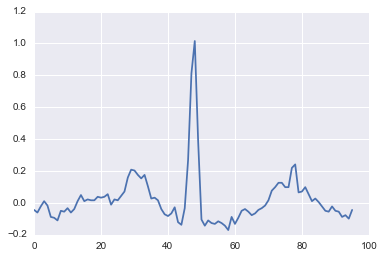

In [70]:
plt.plot(afib_beats[13])

In [69]:
afib_predictions[13]

'0'

### Predicted AFIB Beat

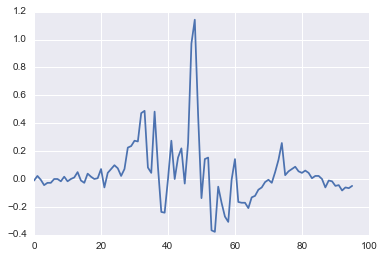

In [38]:
plt.plot(afib_beats[6])

In [39]:
afib_predictions[6]

'1'

# Ventricular Fibrillation Detection

#### Ventricular fibrillation is life-threatening  
Ventricular fibrillation (v-fib for short) is the most serious cardiac rhythm disturbance. The lower chambers quiver and the heart can't pump any blood, causing cardiac arrest.  
How it works
#### The heart's electrical activity becomes disordered.  
When this happens, the heart's lower (pumping) chambers contract in a rapid, unsynchronized way. (The ventricles "fibrillate" rather than beat.) The heart pumps little or no blood. Collapse and sudden cardiac arrest follows -- this is a medical emergency! 

Database for VFIB Detection comes from cudb in Physionet

In [11]:
# path_arr = '/Users/user/physionet.org/physiobank/database/cudb/'

Choose patient from patient_dict

In [72]:
vfib_patient_dict = jl.load('/Users/user/Documents/ecg_research/Databases/VFIB_patients.pickle')

In [73]:
vfib_patient_test = vfib_patient_dict['cu01']

Function *predict_vfib* from *ecg_util* uses raw ECG signal as input and outputs the predictions, the extracted beats and the reduced beats (reduced using PCA)

In [74]:
vfib_predict_dict = ecg_util.predict_vfib(vfib_patient_test)
vfib_predictions = vfib_predict_dict['predictions']
vfib_beats = vfib_predict_dict['beats']
vfib_pca_beats = vfib_predict_dict['PCA beats']

### Predicted Normal Beat

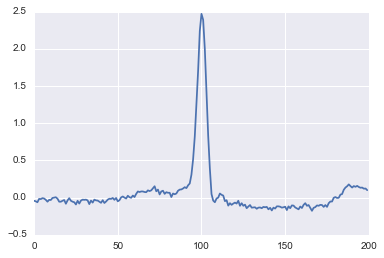

In [80]:
plt.plot(vfib_beats[3])

In [83]:
vfib_predictions[3]

'N'

### Predicted VFIB Beat

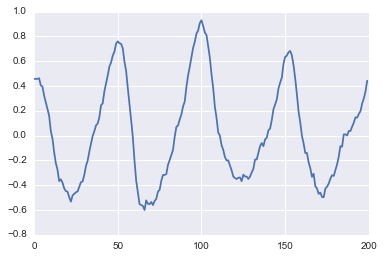

In [89]:
plt.plot(vfib_beats[-3])

In [90]:
vfib_predictions[-3]

'V'